In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [84]:
data = pd.read_csv("PHILIPPINES_BEVERAGE_PURCHASE_HHP_CLEANED.csv",encoding='utf-16')

In [31]:
data

seqno      house  weekday trade       channel  \
0              1  101006101        1    MT  SUPERMARKETS   
1              2  101006101        2    MT  SUPERMARKETS   
2              3  101006101        2    MT  SUPERMARKETS   
3              4  101006101        2    MT  SUPERMARKETS   
4              5  101006101        2    MT  SUPERMARKETS   
5              6  101006101        2    MT  SUPERMARKETS   
6              7  101006101        4    MT  SUPERMARKETS   
7              8  101006101        2    MT  SUPERMARKETS   
8              9  101006101        2    MT  SUPERMARKETS   
9             10  101006101        2    MT  SUPERMARKETS   
10            11  101006101        4    MT  SUPERMARKETS   
11            12  101006101        3    TT       GIFTING   
12            13  101006101        2    MT  SUPERMARKETS   
13            14  101006101        2    MT  SUPERMARKETS   
14            15  101006101        2    MT  SUPERMARKETS   
15            16  101006101        4    MT  SUPERMARKETS   
16            17  101006101        4    MT  SUPERMARKETS   
17            18  101006101        4    MT  SUPERMARKETS   
18            19  101006101        2    MT  SUPERMARKETS   
19            20  101006101        2    MT  SUPERMARKETS   
20            21  101006101        4    MT  SUPERMARKETS   
21            22  101006101        4    MT  SUPERMARKETS   
22            23  101006101        4    MT  SUPERMARKETS   
23            24  101006101        6    MT  SUPERMARKETS   
24            25  101006101        6    MT  SUPERMARKETS   
25            26  101006101        4    MT  SUPERMARKETS   
26            27  101006101        4    MT  SUPERMARKETS   
27            28  101006101        4    MT  SUPERMARKETS   
28            29  101006101        4    MT  SUPERMARKETS   
29            30  101006101        4    MT  SUPERMARKETS   
...          ...        ...      ...   ...           ...   
1233148  1233149  965056001        3    TT  PROVISION ST   
1233149  1233150  965056001        4    TT  PROVISION ST   
1233150  1233151  965056001        5    TT  PROVISION ST   
1233151  1233152  965056001        2    TT  PROVISION ST   
1233152  1233153  965056001        3    TT  PROVISION ST   
1233153  1233154  965056001        4    TT  PROVISION ST   
1233154  1233155  965061401        4    TT  PROVISION ST   
1233155  1233156  965061401        6    TT  PROVISION ST   
1233156  1233157  965061401        2    TT  PROVISION ST   
1233157  1233158  965061401        1    TT  PROVISION ST   
1233158  1233159  965061401        4    TT  PROVISION ST   
1233159  1233160  965061401        6    TT  PROVISION ST   
1233160  1233161  965061401        1    TT  PROVISION ST   
1233161  1233162  965061401        4    TT  PROVISION ST   
1233162  1233163  965084801        2    TT  PROVISION ST   
1233163  1233164  965084801        2    TT  PROVISION ST   
1233164  1233165  965085701        7    TT  PROVISION ST   
1233165  1233166  965085701        2    MT  SUPERMARKETS   
1233166  1233167  965085701        7    MT   DRUG STORES   
1233167  1233168  965085701        5    TT  PROVISION ST   
1233168  1233169  965085701        7    MT   DRUG STORES   
1233169  1233170  965085701        2    MT  SUPERMARKETS   
1233170  1233171  965085701        5    MT   DRUG STORES   
1233171  1233172  965086701        1    MT   DRUG STORES   
1233172  1233173  965086701        3    TT     GROCERIES   
1233173  1233174  965086701        4    TT  PROVISION ST   
1233174  1233175  965086701        7    TT  PROVISION ST   
1233175  1233176  965086701        3    TT  PROVISION ST   
1233176  1233177  965086701        7    TT  PROVISION ST   
1233177  1233178  965086701        7    TT  PROVISION ST   

                           Store  Liters_Bought_CORR  Spend_CORR  \
0                          Other               0.270        50.0   
1                          Other               0.500        28.0   
2                          Other               1.800        60.0   
3                 

In [86]:
data_df = pd.DataFrame(data)
data_df['DEMOG_WORKINGSTATUS'].value_counts()

Not Working    717482
Working        515696
Name: DEMOG_WORKINGSTATUS, dtype: int64

In [4]:
data_df.head()

seqno      house  weekday trade       channel  Store  Liters_Bought_CORR  \
0      1  101006101        1    MT  SUPERMARKETS  Other                0.27   
1      2  101006101        2    MT  SUPERMARKETS  Other                0.50   
2      3  101006101        2    MT  SUPERMARKETS  Other                1.80   
3      4  101006101        2    MT  SUPERMARKETS  Other                0.50   
4      5  101006101        2    MT  SUPERMARKETS  Other                0.25   

   Spend_CORR  Price_Per_Liter_CORR  Unit_Size_CORR  ... DEMOG_WORKINGSTATUS  \
0        50.0            185.185185            27.0  ...         Not Working   
1        28.0             56.000000           500.0  ...         Not Working   
2        60.0             33.333333           300.0  ...         Not Working   
3        28.0             56.000000           500.0  ...         Not Working   
4        50.0            200.000000            25.0  ...         Not Working   

  DEMOG_STRATA        DEMOG_LIFESTAGE 1W Rolling Week End 4W Rolling Week End  \
0        Urban  Adult Single / Couple            2/7/2016           2/28/2016   
1        Urban  Adult Single / Couple            2/7/2016           2/28/2016   
2        Urban  Adult Single / Couple            2/7/2016           2/28/2016   
3        Urban  Adult Single / Couple           2/21/2016           2/28/2016   
4        Urban  Adult Single / Couple           2/28/2016           2/28/2016   

  Units_Bought_CORR Packs_Bought_CORR Units_Per_Pack_CORR MANUFACTURER_AGG  \
0              10.0               1.0                10.0      PT Torabika   
1               1.0               1.0                 1.0          PepsiCo   
2               6.0               1.0                 6.0        Coca-Cola   
3               1.0               1.0                 1.0          PepsiCo   
4              10.0               1.0                10.0      PT Torabika   

   BRAND_AGG  
0   Untagged  
1   Untagged  
2  COCA-COLA  
3   Untagged  
4   Untagged  

[5 rows x 37 columns]

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233178 entries, 0 to 1233177
Data columns (total 37 columns):
seqno                   1233178 non-null int64
house                   1233178 non-null int64
weekday                 1233178 non-null int64
trade                   1233178 non-null object
channel                 1233178 non-null object
Store                   1233178 non-null object
Liters_Bought_CORR      1233178 non-null float64
Spend_CORR              1233178 non-null float64
Price_Per_Liter_CORR    1233178 non-null float64
Unit_Size_CORR          1233178 non-null float64
REFID                   1233178 non-null object
CAT                     1233178 non-null object
MANUFACTURER            1233178 non-null object
BRAND                   1233178 non-null object
PACKSIZE                1233178 non-null object
PACKAGE                 1233178 non-null object
FLAVOUR                 1004985 non-null object
VARIANT1                1233178 non-null object
VARIANT2              

In [6]:
data_df[['CAT','MANUFACTURER','BRAND','PACKSIZE','PACKAGE','FLAVOUR','VARIANT1','VARIANT2','SKU_DESC','CW_1Y','CW_2Y']]

CAT                          MANUFACTURER  \
0                        INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
1        LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
2                            SOFTDRINKS                             COCA-COLA   
3        LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
4                        INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
5                            SOFTDRINKS                             COCA-COLA   
6                            SOFTDRINKS                             COCA-COLA   
7                            SOFTDRINKS                             COCA-COLA   
8                        INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
9                            SOFTDRINKS                             COCA-COLA   
10                           SOFTDRINKS                             COCA-COLA   
11                       INSTANT COFFEE             THE FOLGER COFFEE COMPANY   
12                           SOFTDRINKS                             COCA-COLA   
13                       INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
14       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
15       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
16       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
17                           SOFTDRINKS                             COCA-COLA   
18       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
19                       INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
20       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
21                       INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
22       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
23       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
24                           SOFTDRINKS                             COCA-COLA   
25       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
26       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
27                       INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
28       LIQUID / RTD SPORTS / ENERGY D  PEPSI-COLA PRODUCTS PHILIPPINES INC.   
29                       INSTANT COFFEE               PT TORABIKA EKA SEMESTA   
...                                 ...                                   ...   
1233148    DRINKING WATER/MINERAL WATER                    OTHER MANUFACTURER   
1233149    DRINKING WATER/MINERAL WATER                          ASIA BREWERY   
1233150                      SOFTDRINKS                             COCA-COLA   
1233151                      SOFTDRINKS                             COCA-COLA   
1233152    DRINKING WATER/MINERAL WATER                          ASIA BREWERY   
1233153                      SOFTDRINKS                             COCA-COLA   
1233154                      SOFTDRINKS                             COCA-COLA   
1233155                  INSTANT COFFEE                                NESTLE   
1233156                  INSTANT COFFEE                                NESTLE   
1233157                      SOFTDRINKS                            PEPSI COLA   
1233158              LIQUID / RTD JUICE                   HARMAN FOODS PHILS.   
1233159                  INSTANT COFFEE                                NESTLE   
1233160              LIQUID / RTD JUICE             BATATA FOOD PRODUCTS ENT.   
1233161                  INSTANT COFFEE                                   URC   
1233162                  INSTANT COFFEE                                   URC   
1233163                  INSTANT COFFEE                                NESTLE   
1233164    DRINKING WATER/MINERAL WATER                    OTHER MANUFACTURER   
1233165                  INSTANT COFFEE                            

In [7]:
data_df[['DEMOG_REGION','DEMOG_HHSIZE','DEMOG_HHSEC','DEMOG_HWAGE','DEMOG_KIDS']]

DEMOG_REGION DEMOG_HHSIZE DEMOG_HHSEC DEMOG_HWAGE   DEMOG_KIDS
0                NCR  HH Size 1-2           C    Aged 55+     No Child
1                NCR  HH Size 1-2           C    Aged 55+     No Child
2                NCR  HH Size 1-2           C    Aged 55+     No Child
3                NCR  HH Size 1-2           C    Aged 55+     No Child
4                NCR  HH Size 1-2           C    Aged 55+     No Child
5                NCR  HH Size 1-2           C    Aged 55+     No Child
6                NCR  HH Size 1-2           C    Aged 55+     No Child
7                NCR  HH Size 1-2           C    Aged 55+     No Child
8                NCR  HH Size 1-2           C    Aged 55+     No Child
9                NCR  HH Size 1-2           C    Aged 55+     No Child
10               NCR  HH Size 1-2           C    Aged 55+     No Child
11               NCR  HH Size 1-2           C    Aged 55+     No Child
12               NCR  HH Size 1-2           C    Aged 55+     No Child
13               NCR  HH Size 1-2           C    Aged 55+     No Child
14               NCR  HH Size 1-2           C    Aged 55+     No Child
15               NCR  HH Size 1-2           C    Aged 55+     No Child
16               NCR  HH Size 1-2           C    Aged 55+     No Child
17               NCR  HH Size 1-2           C    Aged 55+     No Child
18               NCR  HH Size 1-2           C    Aged 55+     No Child
19               NCR  HH Size 1-2           C    Aged 55+     No Child
20               NCR  HH Size 1-2           C    Aged 55+     No Child
21               NCR  HH Size 1-2           C    Aged 55+     No Child
22               NCR  HH Size 1-2           C    Aged 55+     No Child
23               NCR  HH Size 1-2           C    Aged 55+     No Child
24               NCR  HH Size 1-2           C    Aged 55+     No Child
25               NCR  HH Size 1-2           C    Aged 55+     No Child
26               NCR  HH Size 1-2           C    Aged 55+     No Child
27               NCR  HH Size 1-2           C    Aged 55+     No Child
28               NCR  HH Size 1-2           C    Aged 55+     No Child
29               NCR  HH Size 1-2           C    Aged 55+     No Child
...              ...          ...         ...         ...          ...
1233148      VISAYAS  HH Size 3-4           D  Aged 25-34  Kids age <3
1233149      VISAYAS  HH Size 3-4           D  Aged 25-34  Kids age <3
1233150      VISAYAS  HH Size 3-4           D  Aged 25-34  Kids age <3
1233151      VISAYAS  HH Size 3-4           D  Aged 25-34  Kids age <3
1233152      VISAYAS  HH Size 3-4           D  Aged 25-34  Kids age <3
1233153      VISAYAS  HH Size 3-4           D  Aged 25-34  Kids age <3
1233154  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233155  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233156  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233157  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233158  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233159  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233160  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233161  NORTH LUZON  HH Size 1-2           E  Aged 25-34  Kids age <3
1233162  SOUTH LUZON  HH Size 5-6           D  Aged 25-34  Kids age <3
1233163  SOUTH LUZON  HH Size 5-6           D  Aged 25-34  Kids age <3
1233164  NORTH LUZON  HH Size 3-4           E    Under 25  Kids age <3
1233165  NORTH LUZON  HH Size 3-4           E    Under 25  Kids age <3
1233166  NORTH LUZON  HH Size 3-4           E    Under 25  Kids age <3
1233167  NORTH LUZON  HH Size 3-4           E    Under 25  Kids age <3
1233168  NORTH LUZON  HH Size 3-4           E    Under 25  Kids age <3
1233169  NORTH LUZON  HH Size 3-4           E    Under 25  Kids age <3
1233170  NORTH LUZON  HH Size 3-4           E    Under 25  Kids age <3
1233171          NCR  HH Size 3-4           E  Aged 25-34  Kids age <3
1233172          NCR  HH Size 3-

In [8]:
data_df['channel'].value_counts()

PROVISION ST        1009619
SUPERMARKETS         130630
GROCERIES             32869
HYPERMARKETS          22760
GIFTING               15015
DRUG STORES           12446
CONVENIENCE ST         5438
OTHERS                 2479
DIRECT SALES           1811
PERSONAL CARE ST         63
DEPARTMENT ST            27
ONLINE SHOP              21
Name: channel, dtype: int64

In [ ]:
# for i in range(1,len(data_df.columns)):
#     name = data_df.columns[i]
#     print(len(data_df[name]),name,data_df[name].unique())


1233178 house [101006101 101014101 101030101 ... 965084801 965085701 965086701]
1233178 weekday [1 2 4 3 6 5 7]
1233178 trade ['MT' 'TT' 'Not Specified']
1233178 channel ['SUPERMARKETS' 'GIFTING' 'HYPERMARKETS' 'PROVISION ST' 'CONVENIENCE ST'
 'GROCERIES' 'DRUG STORES' 'OTHERS' 'DIRECT SALES' 'ONLINE SHOP'
 'PERSONAL CARE ST' 'DEPARTMENT ST']
1233178 Store ['Other' 'Puregold Hypermarket' 'Water Refilling Station' 'SM Hypermarket'
 'Ever' 'Sari-sari stores' 'Peddlers' '7-Eleven' 'New South Star Drug'
 'Mercury Drug' 'SM Save More' 'SM Supermarket' 'Waltermart' 'Landmark'
 'Super 8' 'Puregold Jr' "Robinson's" 'Alfa Mart' "Liana's"
 'Market Stalls' 'Shopwise' 'South Supermarket' 'Bakery/Bakeshop'
 'Other Provision St.' 'Metro Market Gaisano' 'Ministop' 'Tropical Hut'
 'Isetan' 'Citimart' 'Puregold Extra' 'Nesabel' 'S&R Pricemart' "Rustan's"
 'Cherry Foodarama' 'Rose Pharmacy' 'Super Metro Gaisano' 'Gaisano Metro'
 'Prince Hypermarket' "Watson's" 'Family Mart' 'CSI' 'Personal Collection'
 

1233178 REFID ['REFID06202150524077195004000' 'REFID05902060006002002005000'
 'REFID06802040083003006000000' ... 'REFID46400010103001007010001'
 'REFID46404120213002005011001' 'REFID06200010101001008004000']
1233178 CAT ['INSTANT COFFEE' 'LIQUID / RTD SPORTS / ENERGY D' 'SOFTDRINKS'
 'LIQUID / RTD JUICE' 'DRINKING WATER/MINERAL WATER' 'UHT MILK'
 'POWDER SPORTS / ENERGY DRINK']
1233178 MANUFACTURER ['PT TORABIKA EKA SEMESTA' 'PEPSI-COLA PRODUCTS PHILIPPINES INC.'
 'COCA-COLA' 'THE FOLGER COFFEE COMPANY' 'DEL MONTE PHILS.'
 'PEPSI-COLA PHILIPPINES' 'SAPPE PUBLIC COMPANY LIMITED'
 'PHILIPPINE SPRING WATER RESOURCES INC.' 'OTHER MANUFACTURER'
 'ASIA BREWERY' 'MAGNOLIA INC.' 'NESTLE' 'URC' 'ZEST-O CORP.'
 'ZEST.O CORPORATION' 'MANILA GOLDEN ARCHER GROUP INC.' 'PEPSI COLA'
 'ARC - ASIAWIDE REFRESHMENTS CORPORATION' 'PT SANTOS (JAYA ABADI)'
 'SMALL TRADE' 'COCA COLA BOTLLERS INC' 'UNIVERSAL ROBINA CORP.'
 'OTSUKA PHARMACEUTICALS PHIL. INC.' 'SAN MIGUEL SUPER COFFEEMIX CO. INC.'
 'CFC CORPORA

1233178 PACKAGE ['SACHET' 'PLASTIC BOTTLE' 'CAN' 'SACHET (DUO / TWIN PACK)'
 'BOTTLED WATER' 'DISPENSER' 'TETRA PACK' 'DOY PACK' 'GLASS BOTTLE'
 'REFILL' 'DOY PACK (RESEALABLE)' 'TETRA PACK (W/ TWIST TOP)'
 'PLASTIC PACK' 'STICK' 'PLASTIC BOTTLE W/ SPORTS CAP' 'BOX (STICK)' 'BOX'
 'PLASTIC PACK (STICK)' 'DOY PACK (W/ TWIST TOP)' 'MUG' 'PLASTIC CUP'
 'FOIL PACK' 'PLASTIC CELLOPHANE' 'POLY BAG' 'UTILITY JAR' ' '
 'FOIL PACK (W/ TWIST TOP)' 'PLASTIC PACK (REFILL)' 'MASON JAR'
 'PLASTIC POUCH' 'STYRO CUP' 'HARD PAPER' 'BAG/POUCH' 'BOTTLE']
1233178 FLAVOUR ['BROWN / BROWN COFFEE / BROWN COFFEE MIX' 'LEMON-LIME'
 'REGULAR COLA / COLA' 'MORE IN 1' 'LEMON-LIME / LEMON + LIME'
 'CLASSIC ROAST' 'TROPICAL FRUIT/FRUIT PUNCH' 'ORANGE CHILL' 'GRAPE'
 'BLUE BOLT' 'ORANGE WITH REAL JUICE (FRESH)'
 'ORANGE W/ PULP / ORANGE MOST PULP / PULPY ORANGE FLAVOR/ORANGE JUICY PULP/ ORANGE WITH REAL ORANGE PULP'
 'PINEAPPLE W/ VITAMIN A.C.E.' 'PULPY FOUR SEASONS (MIXED FRUIT)'
 'BLACK 3 IN ONE' 'ORANGE'
 'FOUR S

1233178 VARIANT1 ['JUST RIGHT BLEND COFFEE MIX' 'REGULAR (PET)' ' ' 'REGULAR/CLASSIC'
 'JUICE DRINK' "STRONG 'N RICH / STRONG AND RICH / STRONG & RICH TASTE"
 "FIT 'N RIGHT WITH GCE + L - CARNITINE" 'LOW FAT / LOW FAT MILK'
 'NORMAL FAT' 'STERILIZED' 'WHITE (SMOOTH & CREAMY)'
 'ORIGINAL BLEND / ORIGINAL / THE ORIGINAL' 'CREAMYLATTE'
 'BREWED 100% PURE COFFEE' 'WITH NESTLE MILK (POWDERED MILK DRINK)'
 'CREAMY WHITE' 'BARAKO' "BROWN 'N CREAMY/BROWN AND CREAMY"
 'WHITE (SMOOTH & CHOCOLATEY)' 'STRONG / STRONG COFFEE'
 'COCO FLAVOR COMPLETE COFFEEMIX' 'EXTRA CREAMY COFFEEMIX' 'BREWED TASTE'
 'PREMIUM' 'UNSPECIFIED' 'FILLED MILK (STERILIZED)' 'NON FAT (0% FAT)'
 'SMOOTH AND INDULGENT' 'STRAWBERRY FLAVOR COMPLETE COFFEE MIX'
 'WHITE (SMOOTH & CARAMELLY)' 'WHITE COFFEE / WHITE' 'FIERCE'
 'ORIGINAL (CREAMIER TASTE & RICHER AROMA)' 'BROWN (SWEET & RICH)'
 'BROWN COFFEE / BROWN' "WHITE AND CREAMY / WHITE 'N CREAMY"
 'ACTIVE ISOTONIC DRINK' 'MICROGROUND COFFEE (100% ARABICA COFFEE BEANS)'
 'FRENCH

1233178 SKU_DESC ['INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO 27.5 G (8- W/ 10% MORE CONTENT) SACHET BROWN / BROWN COFFEE / BROWN COFFEE MIX JUST RIGHT BLEND COFFEE MIX'
 'LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PRODUCTS PHILIPPINES INC. GATORADE 500ML PLASTIC BOTTLE LEMON-LIME REGULAR (PET)'
 'SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MISMO P10) PLASTIC BOTTLE REGULAR COLA / COLA'
 ...
 'LIQUID / RTD JUICE OTHER MANUFACTURER OTHER BRANDS 201 ML & ABOVE PLASTIC CUP ORANGE / ORANGE NO PULP / CRAN ORANGE  READY-TO-DRINK'
 'LIQUID / RTD JUICE LIWAYWAY CORP. FROOZE - OISHI 230 ML PLASTIC BOTTLE PINEAPPLE JUICE DRINK READY-TO-DRINK'
 'INSTANT COFFEE OTHER MANUFACTURER OTHER BRANDS 50G &Below SACHET 3-in-1 GANODERMA EXTRACT / GANODERMA COFFEE']
1233178 CW_1Y [    0  4756 13078  4835  2695  4122  4042 10225  2933  2299  5073  3804
  2774  2536  4597  3012  4518  4993  5231  5152  4280  4439  1744  2061
  1189  3725  4676  1902  3329  1823  1982  2457  2378  1347  2140  3091
  1268 1070

1233178 MANUFACTURER_AGG ['PT Torabika' 'PepsiCo' 'Coca-Cola' 'OTHERS' 'Del Monte'
 'Philippine SpringWater' 'Asia Brewery' 'Nestle' 'URC' 'Zesto'
 'Asiawide Refreshments' 'RFM Corp.' 'Fonterra' 'Dole']
1233178 BRAND_AGG ['Untagged' 'COCA-COLA' 'SPRITE' 'ROYAL' 'LIVING WATER' 'MOUNTAIN DEW'
 'RC COLA' 'AQUA' 'PEPSI' '7 UP' 'FRUIT SODA' 'QUALI PURE' 'AQUA PURE'
 'CRYSTAL CLEAR' 'WILKINS' 'ZESTO' 'MIRINDA' 'SPARKLE' 'WATER MARKET'
 'WATER FOR LESS' 'AQUA BEST' 'POP']


In [9]:
#drop useless columns
def drop_columns():
    data_df.drop(['MANUFACTURER','BRAND','REFID'],axis=1)

drop_columns()

In [10]:
# data_df.info()
data_df['DEMOG_LIFESTAGE'].unique()

array(['Adult Single / Couple', 'Older HH', 'Mixed HH', 'Young HH',
       'Adult HH'], dtype=object)

In [11]:
data_df['trade'].unique()

array(['MT', 'TT', 'Not Specified'], dtype=object)

In [12]:
def deal_with_trade():
    data_df.trade[data_df['trade']=='Not Specified']='TT'
deal_with_trade()

C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
data_df['trade'].unique()

array(['MT', 'TT'], dtype=object)

In [14]:
data_df['trade'].count()

1233178

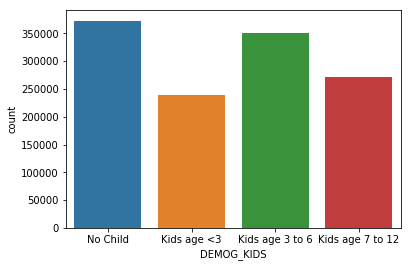

In [15]:
# data_df.groupby(data_df['DEMOG_KIDS']).count()
sns.countplot(data_df['DEMOG_KIDS'])

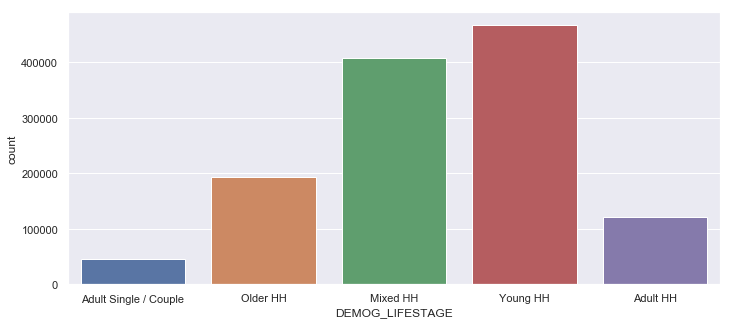

In [16]:
# data_df.groupby(data_df['DEMOG_LIFESTAGE']).count()
sns.set(rc={'figure.figsize':(11.7,5)})
sns.countplot(data_df['DEMOG_LIFESTAGE'])

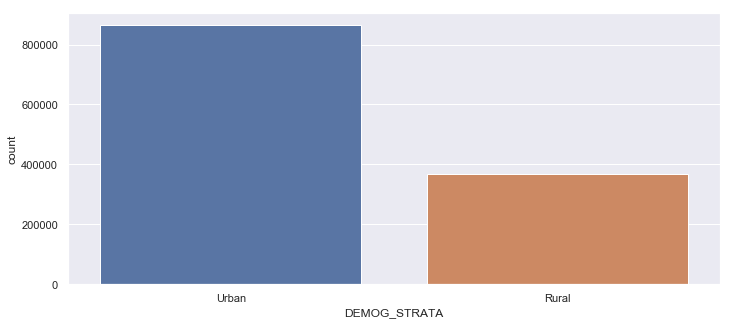

In [17]:
# data_df.groupby(data_df['DEMOG_STRATA']).count()
sns.countplot(data_df['DEMOG_STRATA'])

In [18]:
data_df['VARIANT1'].unique()

array(['JUST RIGHT BLEND COFFEE MIX', 'REGULAR (PET)', ' ',
       'REGULAR/CLASSIC', 'JUICE DRINK',
       "STRONG 'N RICH / STRONG AND RICH / STRONG & RICH TASTE",
       "FIT 'N RIGHT WITH GCE + L - CARNITINE", 'LOW FAT / LOW FAT MILK',
       'NORMAL FAT', 'STERILIZED', 'WHITE (SMOOTH & CREAMY)',
       'ORIGINAL BLEND / ORIGINAL / THE ORIGINAL', 'CREAMYLATTE',
       'BREWED 100% PURE COFFEE',
       'WITH NESTLE MILK (POWDERED MILK DRINK)', 'CREAMY WHITE', 'BARAKO',
       "BROWN 'N CREAMY/BROWN AND CREAMY", 'WHITE (SMOOTH & CHOCOLATEY)',
       'STRONG / STRONG COFFEE', 'COCO FLAVOR COMPLETE COFFEEMIX',
       'EXTRA CREAMY COFFEEMIX', 'BREWED TASTE', 'PREMIUM', 'UNSPECIFIED',
       'FILLED MILK (STERILIZED)', 'NON FAT (0% FAT)',
       'SMOOTH AND INDULGENT', 'STRAWBERRY FLAVOR COMPLETE COFFEE MIX',
       'WHITE (SMOOTH & CARAMELLY)', 'WHITE COFFEE / WHITE', 'FIERCE',
       'ORIGINAL (CREAMIER TASTE & RICHER AROMA)', 'BROWN (SWEET & RICH)',
       'BROWN COFFEE / BROWN', "WH

In [19]:
data_df['VARIANT2'].unique()

array([' ', 'READY-TO-DRINK', 'CONCENTRATED', 'PURE FRESH',
       'FRESH MILK (HI-CALCIUM) / FRESH MILK (HIGH IN CALCIUM)',
       'REGULAR', 'FULL CREAM (STERILIZED RECOMBINED)',
       'CHOCO MILK / CHOCOLATE MILK',
       'CHOCOLATE MILK DRINK WITH ZEST BOOSTERS', 'FORTIFIED',
       'OAT DAIRY DRINK', 'LOW FAT MILK (HI-CALCIUM)',
       'FULL CREAM MILK / FULL CREAM', 'PREMIUM MILK', 'FRESH MILK',
       'WHOLE MILK', 'FORTIFIED MILK (FOR STRONG BONES. BODY & BRAIN)',
       'FULL CREAM MILK STERILIZED (HIGH SOURCE OF CALCIUM)',
       'HI CALCIUM/HIGH CALCIUM', 'STERILIZED FILLED MILK',
       'MILK + FINELY GROUND OATS (CREAMY & SMOOTH)',
       'CHOCO MILK DRINK W/ CGF & TAURINE HIGH CALCIUM', 'MILK',
       'FULL CREAM MILK (HIGH SOURCE OF CALCIUM)',
       'CHOCO CHUG WITH FINELY GROUND OATS', 'FORTIFIED MILK',
       'SWEET MILK', 'CHOCOLATE MILK DRINK SOURCE OF CALCIUM & VITAMIN A',
       'MILK CHOCOLATE MORE KID POWER (CHOLINE + MAGNESIUM)',
       'CHOCOLATE MILK DRINK (

In [20]:
data_df.isnull().any()

seqno                   False
house                   False
weekday                 False
trade                   False
channel                 False
Store                   False
Liters_Bought_CORR      False
Spend_CORR              False
Price_Per_Liter_CORR    False
Unit_Size_CORR          False
REFID                   False
CAT                     False
MANUFACTURER            False
BRAND                   False
PACKSIZE                False
PACKAGE                 False
FLAVOUR                  True
VARIANT1                False
VARIANT2                False
SKU_DESC                False
CW_1Y                   False
CW_2Y                   False
DEMOG_REGION            False
DEMOG_HHSIZE            False
DEMOG_HHSEC             False
DEMOG_HWAGE             False
DEMOG_KIDS              False
DEMOG_WORKINGSTATUS     False
DEMOG_STRATA            False
DEMOG_LIFESTAGE         False
1W Rolling Week End     False
4W Rolling Week End     False
Units_Bought_CORR       False
Packs_Boug

In [21]:
data_df['FLAVOUR'].unique()

array(['BROWN / BROWN COFFEE / BROWN COFFEE MIX', 'LEMON-LIME',
       'REGULAR COLA / COLA', 'MORE IN 1', 'LEMON-LIME / LEMON + LIME',
       'CLASSIC ROAST', 'TROPICAL FRUIT/FRUIT PUNCH', 'ORANGE CHILL',
       'GRAPE', 'BLUE BOLT', 'ORANGE WITH REAL JUICE (FRESH)',
       'ORANGE W/ PULP / ORANGE MOST PULP / PULPY ORANGE FLAVOR/ORANGE JUICY PULP/ ORANGE WITH REAL ORANGE PULP',
       'PINEAPPLE W/ VITAMIN A.C.E.', 'PULPY FOUR SEASONS (MIXED FRUIT)',
       'BLACK 3 IN ONE', 'ORANGE',
       'FOUR SEASONS / SECRETS OF THE VALLEY / FRUIT MEDLEY',
       'MELON W/ NATA DE COCO', 'DISTILLED',
       'ALKALINE / REGULAR ALKALINE', nan, 'PLAIN',
       'PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER', '3-in-1',
       'PULPY MANGO-ORANGE',
       'APPLE  / ISLAND APPLE / APPLE 100%/ 100% APPLE',
       'LOW ACID - COFFEEMIX', 'HOUSE BLEND',
       'CREAMY WHITE (NOW MILKIER)', 'CHOCOLATE / CHOCO',
       'CREAMY COFFEE MIX', 'CREAMY WHITE', 'ORANGE (SWEETENED)',
       'COMPLETE COFF

In [22]:
num = data_df.isna().sum()
num

seqno                        0
house                        0
weekday                      0
trade                        0
channel                      0
Store                        0
Liters_Bought_CORR           0
Spend_CORR                   0
Price_Per_Liter_CORR         0
Unit_Size_CORR               0
REFID                        0
CAT                          0
MANUFACTURER                 0
BRAND                        0
PACKSIZE                     0
PACKAGE                      0
FLAVOUR                 228193
VARIANT1                     0
VARIANT2                     0
SKU_DESC                     0
CW_1Y                        0
CW_2Y                        0
DEMOG_REGION                 0
DEMOG_HHSIZE                 0
DEMOG_HHSEC                  0
DEMOG_HWAGE                  0
DEMOG_KIDS                   0
DEMOG_WORKINGSTATUS          0
DEMOG_STRATA                 0
DEMOG_LIFESTAGE              0
1W Rolling Week End          0
4W Rolling Week End          0
Units_Bo

In [87]:
# def deal_na(value):
#     if value = np.nan:
#         return -1
# data_df['FLAVOUR']
data_df['FLAVOUR']=data_df['FLAVOUR'].fillna("N")
data_df['FLAVOUR']

0                    BROWN / BROWN COFFEE / BROWN COFFEE MIX
1                                                 LEMON-LIME
2                                        REGULAR COLA / COLA
3                                                 LEMON-LIME
4                                                  MORE IN 1
5                                        REGULAR COLA / COLA
6                                        REGULAR COLA / COLA
7                                  LEMON-LIME / LEMON + LIME
8                                                  MORE IN 1
9                                        REGULAR COLA / COLA
10                                       REGULAR COLA / COLA
11                                             CLASSIC ROAST
12                                       REGULAR COLA / COLA
13                   BROWN / BROWN COFFEE / BROWN COFFEE MIX
14                                TROPICAL FRUIT/FRUIT PUNCH
15                                              ORANGE CHILL
16                      

In [58]:
num = data_df.isna().sum()
num

seqno                   0
house                   0
weekday                 0
trade                   0
channel                 0
Store                   0
Liters_Bought_CORR      0
Spend_CORR              0
Price_Per_Liter_CORR    0
Unit_Size_CORR          0
REFID                   0
CAT                     0
MANUFACTURER            0
BRAND                   0
PACKSIZE                0
PACKAGE                 0
FLAVOUR                 0
VARIANT1                0
VARIANT2                0
SKU_DESC                0
CW_1Y                   0
CW_2Y                   0
DEMOG_REGION            0
DEMOG_HHSIZE            0
DEMOG_HHSEC             0
DEMOG_HWAGE             0
DEMOG_KIDS              0
DEMOG_WORKINGSTATUS     0
DEMOG_STRATA            0
DEMOG_LIFESTAGE         0
1W Rolling Week End     0
4W Rolling Week End     0
Units_Bought_CORR       0
Packs_Bought_CORR       0
Units_Per_Pack_CORR     0
MANUFACTURER_AGG        0
BRAND_AGG               0
dtype: int64

In [60]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233178 entries, 0 to 1233177
Data columns (total 37 columns):
seqno                   1233178 non-null int64
house                   1233178 non-null int64
weekday                 1233178 non-null int64
trade                   1233178 non-null object
channel                 1233178 non-null object
Store                   1233178 non-null object
Liters_Bought_CORR      1233178 non-null float64
Spend_CORR              1233178 non-null float64
Price_Per_Liter_CORR    1233178 non-null float64
Unit_Size_CORR          1233178 non-null float64
REFID                   1233178 non-null object
CAT                     1233178 non-null object
MANUFACTURER            1233178 non-null object
BRAND                   1233178 non-null object
PACKSIZE                1233178 non-null object
PACKAGE                 1233178 non-null object
FLAVOUR                 1233178 non-null object
VARIANT1                1233178 non-null object
VARIANT2              

In [149]:
data_df['FLAVOUR'].unique()

array(['BROWN / BROWN COFFEE / BROWN COFFEE MIX', 'LEMON-LIME',
       'REGULAR COLA / COLA', 'MORE IN 1', 'LEMON-LIME / LEMON + LIME',
       'CLASSIC ROAST', 'TROPICAL FRUIT/FRUIT PUNCH', 'ORANGE CHILL',
       'GRAPE', 'BLUE BOLT', 'ORANGE WITH REAL JUICE (FRESH)',
       'ORANGE W/ PULP / ORANGE MOST PULP / PULPY ORANGE FLAVOR/ORANGE JUICY PULP/ ORANGE WITH REAL ORANGE PULP',
       'PINEAPPLE W/ VITAMIN A.C.E.', 'PULPY FOUR SEASONS (MIXED FRUIT)',
       'BLACK 3 IN ONE', 'ORANGE',
       'FOUR SEASONS / SECRETS OF THE VALLEY / FRUIT MEDLEY',
       'MELON W/ NATA DE COCO', 'DISTILLED',
       'ALKALINE / REGULAR ALKALINE', 'N', 'PLAIN',
       'PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER', '3-in-1',
       'PULPY MANGO-ORANGE',
       'APPLE  / ISLAND APPLE / APPLE 100%/ 100% APPLE',
       'LOW ACID - COFFEEMIX', 'HOUSE BLEND',
       'CREAMY WHITE (NOW MILKIER)', 'CHOCOLATE / CHOCO',
       'CREAMY COFFEE MIX', 'CREAMY WHITE', 'ORANGE (SWEETENED)',
       'COMPLETE COFF

In [167]:
data_df[["BRAND_AGG"]] = data_df[["BRAND_AGG"]].astype("category")

In [168]:
new_df=data_df[data_df['FLAVOUR'] != "N"]
no_na_df_feature = new_df[['BRAND_AGG']]
no_na_df_target = new_df[['FLAVOUR']]
only_na_df_test = data_df[data_df['FLAVOUR'] == "N"]
na_df_test = only_na_df_test[['BRAND_AGG']]
X = pd.get_dummies(no_na_df_feature, prefix_sep='_', drop_first=True)
Y = no_na_df_target

gnb = GaussianNB()
gnb.fit(X, Y)

C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [169]:
test = pd.get_dummies(na_df_test, prefix_sep='_', drop_first=True)

In [170]:
gnb_pred = gnb.predict(test)

In [171]:
gnb_pred

array(['3-in-1', '3-in-1', '3-in-1', ..., 'LEMON. LIME & BUBBLES',
       'LEMON. LIME & BUBBLES', '3-in-1'], dtype='<U103')

In [116]:
X.columns

Index(['BRAND_1', 'BRAND_100 PLUS', 'BRAND_1ST HEALTH - UNO', 'BRAND_2BIG',
       'BRAND_7 DROPS', 'BRAND_7 SELECT', 'BRAND_7-Up',
       'BRAND_8 O'CLOCK FUNCHUM', 'BRAND_A & W', 'BRAND_ABSOLUTE',
       ...
       'BRAND_ZEST-O (CHOC-O)', 'BRAND_ZEST-O (MILK-O)',
       'BRAND_ZEST-O FRUIT SODA', 'BRAND_ZEST-O SLICE',
       'BRAND_ZEST-O SUNBURST SELECT', 'BRAND_ZESTO', 'BRAND_ZESTO BIG 250',
       'BRAND_ZESTO JR', 'BRAND_ZIP', 'BRAND_lend'],
      dtype='object', length=585)

In [109]:
Y.columns

Index(['FLAVOUR'], dtype='object')

In [70]:
len(new_df)

1004985

In [101]:
na_df_test.head()

seqno      house  weekday trade       channel                    Store  \
94      95  101006101        5    MT  HYPERMARKETS           SM Hypermarket   
95      96  101006101        1    MT  HYPERMARKETS           SM Hypermarket   
97      98  101006101        1    MT  HYPERMARKETS           SM Hypermarket   
101    102  101006101        1    MT  HYPERMARKETS           SM Hypermarket   
184    185  101014101        7    TT  PROVISION ST  Water Refilling Station   

     Liters_Bought_CORR  Spend_CORR  Price_Per_Liter_CORR  Unit_Size_CORR  \
94                  1.0        17.0             17.000000          1000.0   
95                  1.0        17.0             17.000000          1000.0   
97                  1.0        20.0             20.000000          1000.0   
101                 1.0        20.0             20.000000          1000.0   
184                 6.0        10.0              1.666667          6000.0   

     ... DEMOG_WORKINGSTATUS DEMOG_STRATA        DEMOG_LIFESTAGE  \
94   ...         Not Working        Urban  Adult Single / Couple   
95   ...         Not Working        Urban  Adult Single / Couple   
97   ...         Not Working        Urban  Adult Single / Couple   
101  ...         Not Working        Urban  Adult Single / Couple   
184  ...         Not Working        Urban               Older HH   

    1W Rolling Week End 4W Rolling Week End Units_Bought_CORR  \
94            2/12/2017           2/26/2017               1.0   
95            2/19/2017           2/26/2017               1.0   
97            2/26/2017           2/26/2017               1.0   
101            3/5/2017           3/26/2017               1.0   
184            8/7/2016           8/14/2016               1.0   

    Packs_Bought_CORR Units_Per_Pack_CORR MANUFACTURER_AGG  BRAND_AGG  
94                1.0                 1.0     Asia Brewery   Untagged  
95                1.0                 1.0     Asia Brewery   Untagged  
97                1.0                 1.0     Asia Brewery   Untagged  
101               1.0                 1.0     Asia Brewery   Untagged  
184               1.0                 1.0           OTHERS   Untagged  

[5 rows x 36 columns]

In [97]:
X.columns

Index(['seqno', 'BRAND_100 PLUS', 'BRAND_1ST HEALTH - UNO', 'BRAND_7 SELECT',
       'BRAND_7-Up', 'BRAND_8 O'CLOCK FUNCHUM', 'BRAND_A & W',
       'BRAND_ACHIEVERS COFFEE (AMWAY)', 'BRAND_ADD LIFE', 'BRAND_AIK CHEONG',
       ...
       'BRAND_ZEST-O (CHOC-O)', 'BRAND_ZEST-O (MILK-O)',
       'BRAND_ZEST-O FRUIT SODA', 'BRAND_ZEST-O SLICE',
       'BRAND_ZEST-O SUNBURST SELECT', 'BRAND_ZESTO', 'BRAND_ZESTO BIG 250',
       'BRAND_ZESTO JR', 'BRAND_ZIP', 'BRAND_lend'],
      dtype='object', length=386)

In [117]:
test = pd.get_dummies(na_df_test, prefix_sep='_', drop_first=True)

In [118]:
test.columns

Index(['BRAND_1', 'BRAND_100 PLUS', 'BRAND_1ST HEALTH - UNO', 'BRAND_2BIG',
       'BRAND_7 DROPS', 'BRAND_7 SELECT', 'BRAND_7-Up',
       'BRAND_8 O'CLOCK FUNCHUM', 'BRAND_A & W', 'BRAND_ABSOLUTE',
       ...
       'BRAND_ZEST-O (CHOC-O)', 'BRAND_ZEST-O (MILK-O)',
       'BRAND_ZEST-O FRUIT SODA', 'BRAND_ZEST-O SLICE',
       'BRAND_ZEST-O SUNBURST SELECT', 'BRAND_ZESTO', 'BRAND_ZESTO BIG 250',
       'BRAND_ZESTO JR', 'BRAND_ZIP', 'BRAND_lend'],
      dtype='object', length=585)

In [82]:
X.head()

seqno  BRAND_100 PLUS  BRAND_1ST HEALTH - UNO  BRAND_7 SELECT  BRAND_7-Up  \
0      1               0                       0               0           0   
1      2               0                       0               0           0   
2      3               0                       0               0           0   
3      4               0                       0               0           0   
4      5               0                       0               0           0   

   BRAND_8 O'CLOCK FUNCHUM  BRAND_A & W  BRAND_ACHIEVERS COFFEE (AMWAY)  \
0                        0            0                               0   
1                        0            0                               0   
2                        0            0                               0   
3                        0            0                               0   
4                        0            0                               0   

   BRAND_ADD LIFE  BRAND_AIK CHEONG  ...  BRAND_ZEST-O (CHOC-O)  \
0               0                 0  ...                      0   
1               0                 0  ...                      0   
2               0                 0  ...                      0   
3               0                 0  ...                      0   
4               0                 0  ...                      0   

   BRAND_ZEST-O (MILK-O)  BRAND_ZEST-O FRUIT SODA  BRAND_ZEST-O SLICE  \
0                      0                        0                   0   
1                      0                        0                   0   
2                      0                        0                   0   
3                      0                        0                   0   
4                      0                        0                   0   

   BRAND_ZEST-O SUNBURST SELECT  BRAND_ZESTO  BRAND_ZESTO BIG 250  \
0                             0            0                    0   
1                             0            0                    0   
2                             0            0                    0   
3                             0            0                    0   
4                             0            0                    0   

   BRAND_ZESTO JR  BRAND_ZIP  BRAND_lend  
0               0          0           0  
1               0          0           0  
2               0          0           0  
3               0          0           0  
4               0          0           0  

[5 rows x 386 columns]

In [77]:
test = pd.get_dummies(na_df_test, prefix_sep='_', drop_first=True)

In [80]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233178 entries, 0 to 1233177
Data columns (total 37 columns):
seqno                   1233178 non-null int64
house                   1233178 non-null int64
weekday                 1233178 non-null int64
trade                   1233178 non-null object
channel                 1233178 non-null object
Store                   1233178 non-null object
Liters_Bought_CORR      1233178 non-null float64
Spend_CORR              1233178 non-null float64
Price_Per_Liter_CORR    1233178 non-null float64
Unit_Size_CORR          1233178 non-null float64
REFID                   1233178 non-null object
CAT                     1233178 non-null object
MANUFACTURER            1233178 non-null object
BRAND                   1233178 non-null object
PACKSIZE                1233178 non-null object
PACKAGE                 1233178 non-null object
FLAVOUR                 1233178 non-null object
VARIANT1                1233178 non-null object
VARIANT2              

In [206]:
data_df[["CAT","BRAND_AGG"]] = data_df[["CAT","BRAND_AGG"]].astype("category")

In [209]:
def fill_miss(df, col, na):
    new_df=data_df[data_df['FLAVOUR'] != "N"]
    no_na_df_feature = new_df[['CAT','BRAND_AGG']]
    no_na_df_target = new_df[['FLAVOUR']]
    only_na_df_test = data_df[data_df['FLAVOUR'] == "N"]
    na_df_test = only_na_df_test[['CAT','BRAND_AGG']]
    X = pd.get_dummies(no_na_df_feature, prefix_sep='_', drop_first=True)
    Y = no_na_df_target

    gnb = MultinomialNB(alpha=0.01)
    gnb.fit(X, Y)

    test = pd.get_dummies(na_df_test, prefix_sep='_', drop_first=True)
    gnb_pred = gnb.predict(test)
    return gnb_pred

gnb_pred=fill_miss(data_df,'FLAVOUR', "N")
gnb_pred

C:\Users\Angela_Shi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['3-in-1', '3-in-1', '3-in-1', ...,
       'PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER',
       'PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER', '3-in-1'],
      dtype='<U103')

In [210]:
for value in gnb_pred:
    print(value)

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1


3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINK

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURI

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1


3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED 

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATE

3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PUR

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFI

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1


3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / 

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATE

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PU

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1


3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKI

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATE

3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
BLUE BOLT
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
BLUE BOLT
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1


3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER


3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURI

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFI

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-i

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1


3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-

3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-i

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRI

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING W

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WAT

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WA

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURI

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER 

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WAT

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / P

3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFI

PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-in-1
3-

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

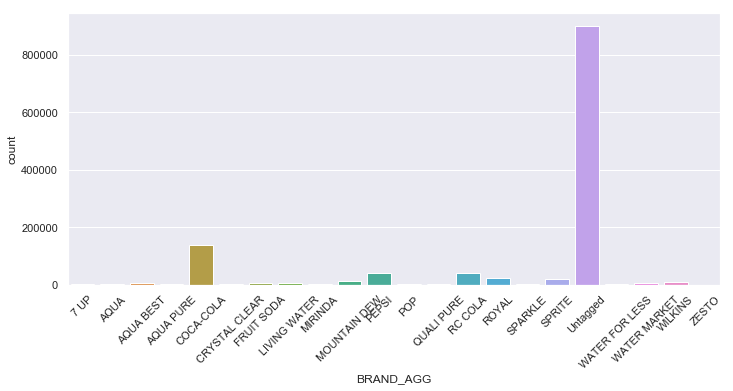

In [178]:
sns.countplot(data_df['BRAND_AGG'])
plt.xticks(rotation=45)

In [191]:
df1 = data_df.groupby(data_df['FLAVOUR']).count()
df1

seqno   house  weekday  \
FLAVOUR                                                                       
                                                        33      33       33   
10 IN 1                                                 46      46       46   
10 IN 1 HERBAL COFFEE                                    1       1        1   
100 % PURE ORANGE                                        2       2        2   
100% APPLE (ORGANICS)                                    5       5        5   
100% PURE COFFEE                                        28      28       28   
100% PURE INSTANT COFFEE                                 4       4        4   
100% YOUNG COCONUT W/ NATA DE COCO                       1       1        1   
12-IN-1                                                  7       7        7   
15 IN 1 HERBAL COFFEE                                   10      10       10   
2 IN 1                                                  10      10       10   
2 IN 1 WHITE COFFEE                                      4       4        4   
3 + 3 COFFEE MIX                                        92      92       92   
3 IN 1 CHARCOAL ROASTED                                 21      21       21   
3 IN 1 COFFEE                                            3       3        3   
3 IN 1 LOW FAT                                           8       8        8   
3 IN 1 WHITE COFFEE (PREMIX) / 3 IN 1 PREMIX WH...      92      92       92   
3 PLUS 1                                               973     973      973   
3 PLUS 1 PERFECT MIX                                     1       1        1   
3-IN-1 BROWN COFFEE MIX                                  9       9        9   
3-IN-1 COMPLETE COFFEE MIX                              36      36       36   
3-IN-1 WHITE COFFEE MIX                                  8       8        8   
3-in-1                                              203906  203906   203906   
4 IN 1                                                 112     112      112   
4 IN 1 COFFEE                                            3       3        3   
4 IN 1 LOW SUGAR                                        18      18       18   
4 IN 1 NO SUGAR ADDED                                    2       2        2   
4 IN 1 SUGAR-FREE                                      212     212      212   
5 IN 1                                                 376     376      376   
5 IN 1 BROWN                                            12      12       12   
...                                                    ...     ...      ...   
THE BLEND 114                                            7       7        7   
THE BLEND 117                                            5       5        5   
THE LEMON-LIME EDGE                                      2       2        2   
TOMATO                                                  21      21       21   
TONIC DRINK                                              1       1        1   
TROPICAL / TROPICAL BLEND/ TROPICAL FRUIT BLEND         10      10       10   
TROPICAL BLEND                                           1       1        1   
TROPICAL BLEND FRUIT MIX                                 3       3        3   
TROPICAL DRINK (ORANGE PINEAPPLE & CHERRY JUICE)         7       7        7   
TROPICAL FRUIT/FRUIT PUNCH                            1007    1007     1007   
UNFLAVORED/ PLAIN                                        1       1        1   
VANILLA                                                227     227      227   
VANILLA MALT                                            54      54       54   
VANILLA SWEET MILK                                      32      32       32   
W/ 35MG GINKGO BILOBA                                   73      73       73   
W/ ACTIVBURN (CONTAINS APPLE JUICE)                     16      16       16   
WATERMELON/PINE WATER MELON                            183     183      183   
WATTAMELON                                               2       2        2   
WHITE (3 IN 1)          

In [194]:
df1.sort_values(by=['seqno'],ascending=False)

seqno   house  weekday  \
FLAVOUR                                                                       
N                                                   228193  228193   228193   
REGULAR COLA / COLA                                 217777  217777   217777   
3-in-1                                              203906  203906   203906   
CREAMY COFFEE MIX                                   107879  107879   107879   
CLASSIC                                              83496   83496    83496   
BROWN / BROWN COFFEE / BROWN COFFEE MIX              41851   41851    41851   
COFFEE GRANULES                                      28647   28647    28647   
CREAMY WHITE (NOW MILKIER)                           28429   28429    28429   
ORANGE                                               26037   26037    26037   
CREAMY WHITE                                         20719   20719    20719   
BLACK 3 IN ONE                                       18578   18578    18578   
CHOCOLATE / CHOCO                                    18149   18149    18149   
BLEND & BREW                                         17945   17945    17945   
CITRUS                                               16569   16569    16569   
CREAMY LATTE                                         16185   16185    16185   
PLAIN                                                15289   15289    15289   
LEMON                                                12485   12485    12485   
APPLE  / ISLAND APPLE / APPLE 100%/ 100% APPLE       10891   10891    10891   
ORANGE (SWEETENED)                                   10557   10557    10557   
LEMON-LIME / LEMON + LIME                             8344    8344     8344   
PURIFIED / PURIFIED WATER / PURIFIED DRINKING W...    8020    8020     8020   
PINEAPPLE W/ VITAMIN A.C.E.                           7545    7545     7545   
JUICY LEMON                                           5475    5475     5475   
BLUE BOLT                                             3696    3696     3696   
ORANGE / ORANGE NO PULP / CRAN ORANGE                 3690    3690     3690   
MANGO (SWEETENED)                                     3544    3544     3544   
LOW ACID - COFFEEMIX                                  3243    3243     3243   
CLASSIC DECAF                                         3153    3153     3153   
COFFEE MIX                                            3126    3126     3126   
DISTILLED                                             3007    3007     3007   
...                                                    ...     ...      ...   
CARROT WITH FRUIT JUICE                                  1       1        1   
CHOCO CRAZE                                              1       1        1   
NO SUGAR                                                 1       1        1   
NATURAL ORANGE JUICE                                     1       1        1   
CREMDENSADA                                              1       1        1   
STRONG COFFEE MIX                                        1       1        1   
MANGOSTEEN                                               1       1        1   
MANGO PASSIONFRUIT                                       1       1        1   
MANDARIN                                                 1       1        1   
GRAPE VITAMIN DRINK (ANTI-STRESS BOOST)                  1       1        1   
KAMIAS                                                   1       1        1   
GUYABANO (SOURSOP)                                       1       1        1   
ORIGINAL BLEND                                           1       1        1   
CAFFEINE FREE                                            1       1        1   
BUAH MERAH GANODERMA COFFEE                              1       1        1   
BLUEBERRY POMEGRANATE                                    1       1        1   
PINEAPPLE LYCHEE WITH PYCOGENOL                          1       1        1   
PINEAPPLE-LYCHEE (WITH PINEAPPLE & NATA BITS)            1       1        1   
POMEGRANATE & BLUEBERRY 

In [211]:
data_df[data_df['FLAVOUR']=='PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER']

seqno      house  weekday trade         channel  \
100          101  101006101        4    TT    PROVISION ST   
149          150  101006101        2    TT    PROVISION ST   
150          151  101006101        5    TT    PROVISION ST   
151          152  101006101        7    TT    PROVISION ST   
920          921  101035101        5    MT  CONVENIENCE ST   
930          931  101035101        1    MT  CONVENIENCE ST   
939          940  101035101        5    MT  CONVENIENCE ST   
2546        2547  101135101        4    MT    HYPERMARKETS   
2825        2826  101135101        4    MT  CONVENIENCE ST   
3276        3277  101174101        1    TT    PROVISION ST   
3277        3278  101174101        4    TT    PROVISION ST   
3278        3279  101174101        5    TT    PROVISION ST   
3596        3597  101195101        6    MT    SUPERMARKETS   
3660        3661  101195101        3    MT    SUPERMARKETS   
3803        3804  101196101        2    TT    PROVISION ST   
6329        6330  101326101        6    MT    SUPERMARKETS   
6335        6336  101326101        4    MT    SUPERMARKETS   
6682        6683  101337101        1    TT    PROVISION ST   
7293        7294  101352101        3    TT    PROVISION ST   
8636        8637  101387101        1    TT    PROVISION ST   
8637        8638  101387101        1    TT    PROVISION ST   
8641        8642  101387101        6    TT    PROVISION ST   
8649        8650  101387101        1    TT    PROVISION ST   
8653        8654  101387101        3    TT    PROVISION ST   
8655        8656  101387101        3    TT    PROVISION ST   
8656        8657  101387101        3    TT    PROVISION ST   
8659        8660  101387101        3    TT    PROVISION ST   
8662        8663  101387101        3    TT    PROVISION ST   
8665        8666  101387101        1    TT    PROVISION ST   
8667        8668  101387101        1    TT    PROVISION ST   
...          ...        ...      ...   ...             ...   
1231543  1231544  965001201        4    TT    PROVISION ST   
1231565  1231566  965001201        5    TT    PROVISION ST   
1231572  1231573  965001201        2    TT    PROVISION ST   
1231582  1231583  965001201        2    TT    PROVISION ST   
1231594  1231595  965001201        5    TT    PROVISION ST   
1231605  1231606  965001201        4    TT    PROVISION ST   
1231613  1231614  965001201        3    TT    PROVISION ST   
1232105  1232106  965003701        1    TT    PROVISION ST   
1232107  1232108  965003701        7    TT    PROVISION ST   
1232108  1232109  965003701        1    TT    PROVISION ST   
1232109  1232110  965003701        7    TT    PROVISION ST   
1232114  1232115  965003701        2    TT    PROVISION ST   
1232119  1232120  965003701        1    TT    PROVISION ST   
1232120  1232121  965003701        3    TT    PROVISION ST   
1232121  1232122  965003701        7    TT    PROVISION ST   
1232122  1232123  965003701        1    TT    PROVISION ST   
1232123  1232124  965003701        7    TT    PROVISION ST   
1232534  1232535  965029301        2    TT    PROVISION ST   
1233037  1233038  965042201        1    MT     DRUG STORES   
1233053  1233054  965042201        1    MT     DRUG STORES   
1233105  1233106  965054801        1    TT    PROVISION ST   
1233108  1233109  965054801        2    TT    PROVISION ST   
1233109  1233110  965054801        4    TT    PROVISION ST   
1233111  1233112  965054801        7    TT    PROVISION ST   
1233114  1233115  965054801        1    TT    PROVISION ST   
1233116  1233117  965054801        3    TT    PROVISION ST   
1233118  1233119  965054801        6    TT    PROVISION ST   
1233121  1233122  965054801        1    TT    PROVISION ST   
1233122  1233123  965054801        3    TT    PROVISION ST   
1233123  1233124  965054801        5    TT    PROVISION ST   

                           Store  Liters_Bought_CORR  Spend_CORR  \
100      Water Refilling Station               18.90        40.0   
149      Water Refilling Stati

In [219]:
data_df.loc[data_df["FLAVOUR"] == "N", "FLAVOUR"] = gnb_pred

In [222]:
sum(data_df["FLAVOUR"]=="N")

0

In [223]:
len(data_df["FLAVOUR"])

1233178